## Step 1: Import Libraries & Load Data

In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
)
import time

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ All libraries imported successfully")
print(f"Lines of code for imports: 20")

✅ All libraries imported successfully
Lines of code for imports: 20


In [3]:
# Load the dataset
start_time = time.time()
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Convert target to meaningful labels
df['diagnosis'] = df['target'].map({0: 'malignant', 1: 'benign'})

print("✅ Dataset loaded successfully")
print(f"Shape: {df.shape}")
print(f"\nTarget distribution:")
print(df['diagnosis'].value_counts())
print(f"\nLines of code: 7")

✅ Dataset loaded successfully
Shape: (569, 32)

Target distribution:
diagnosis
benign       357
malignant    212
Name: count, dtype: int64

Lines of code: 7


## Step 2: Initial Data Exploration

In [4]:
# Display basic information
print("Dataset Info:")
print("=" * 50)
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(df.columns) - 2}")
print(f"\nFirst few rows:")
display(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nBasic Statistics:")
display(df.describe())

print("\nMissing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values")

print(f"\nLines of code: 15")

Dataset Info:
Number of samples: 569
Number of features: 30

First few rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant



Data Types:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst s

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000



Missing Values:
No missing values

Lines of code: 15


## Step 3: Data Visualization - Before Processing

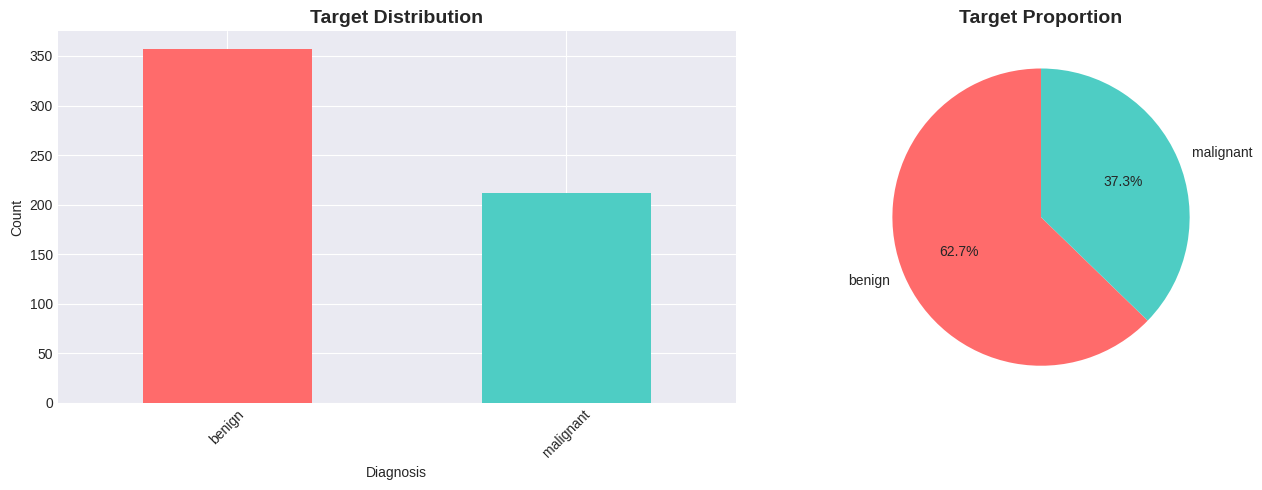

Lines of code for target visualization: 15


In [5]:
# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['diagnosis'].value_counts().plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Target Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
df['diagnosis'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                     colors=['#ff6b6b', '#4ecdc4'], startangle=90)
axes[1].set_title('Target Proportion', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"Lines of code for target visualization: 15")

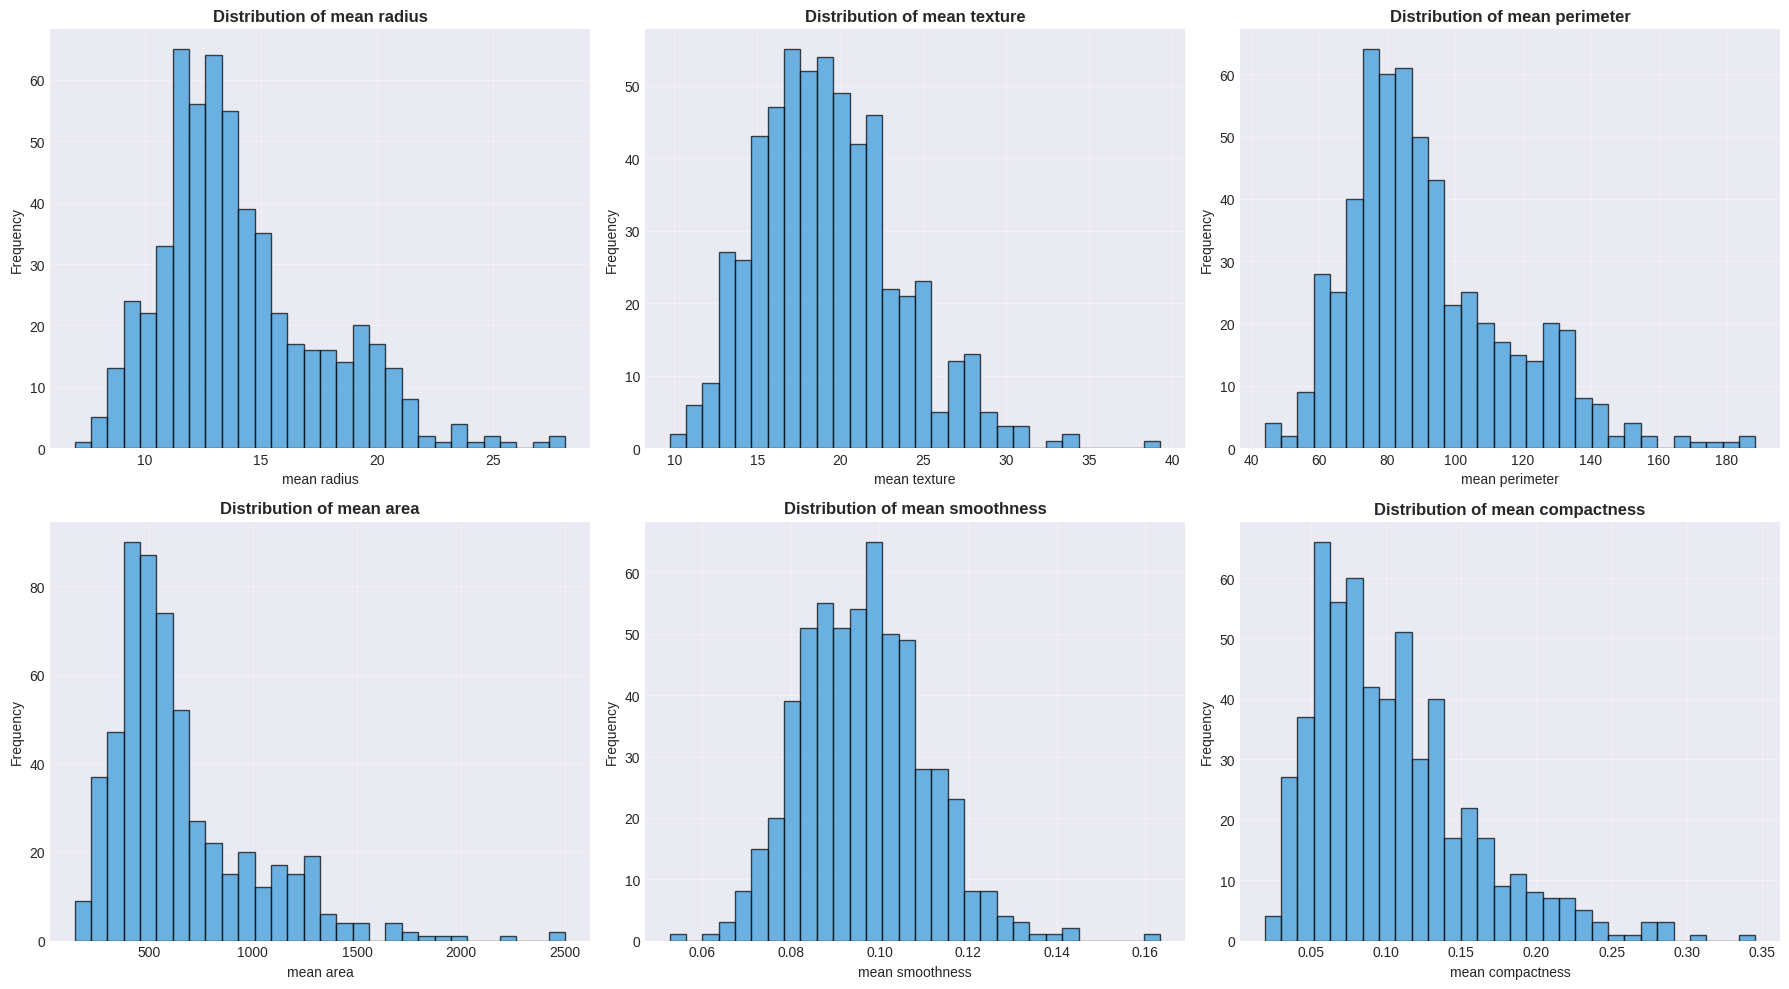

Lines of code for feature distributions: 14


In [6]:
# Distribution of key features
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                'mean smoothness', 'mean compactness']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].hist(df[feature], bins=30, edgecolor='black', alpha=0.7, color='#3498db')
    axes[idx].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Lines of code for feature distributions: 14")

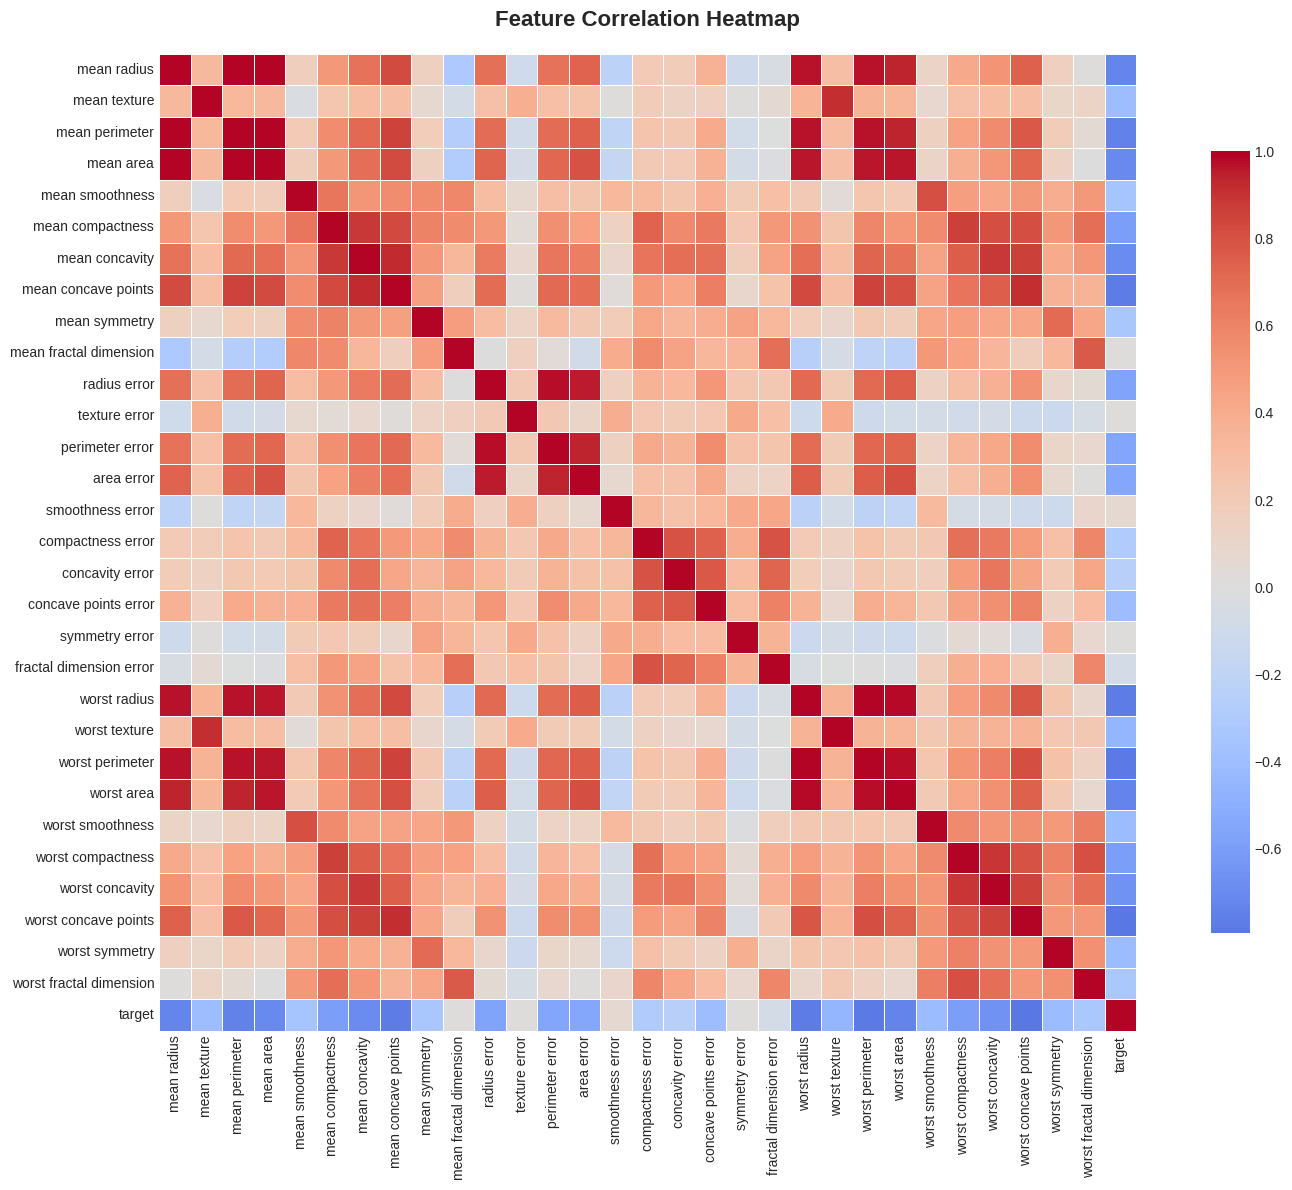

Lines of code for correlation heatmap: 7


In [7]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df.drop(['diagnosis'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(f"Lines of code for correlation heatmap: 7")

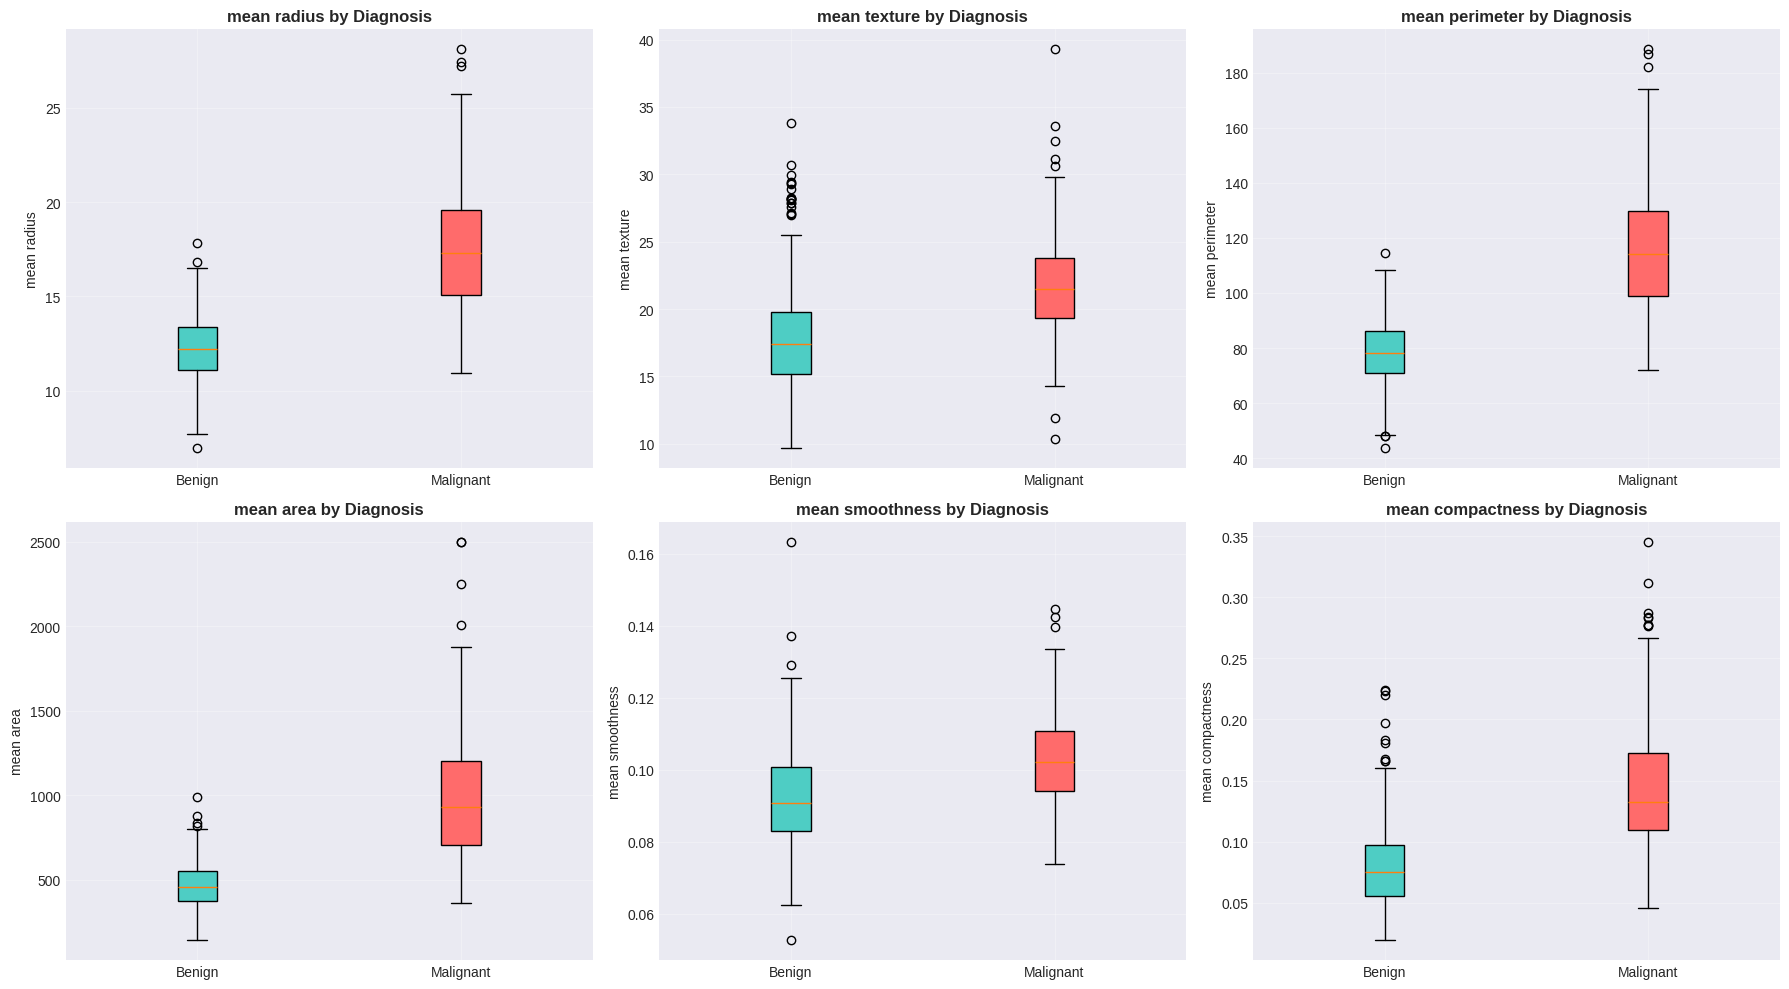

Lines of code for boxplots: 16


In [8]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    box_data = [df[df['diagnosis'] == 'benign'][feature].dropna(),
                df[df['diagnosis'] == 'malignant'][feature].dropna()]
    bp = axes[idx].boxplot(box_data, labels=['Benign', 'Malignant'], patch_artist=True)
    
    for patch, color in zip(bp['boxes'], ['#4ecdc4', '#ff6b6b']):
        patch.set_facecolor(color)
    
    axes[idx].set_title(f'{feature} by Diagnosis', fontweight='bold')
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Lines of code for boxplots: 16")

## Step 4: Data Preprocessing & Feature Engineering

In [9]:
# Check for missing values and duplicates
print("Data Quality Check:")
print("=" * 50)
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any
df_clean = df.drop_duplicates()
print(f"\nRows after removing duplicates: {len(df_clean)}")

print(f"\nLines of code: 8")

Data Quality Check:
Missing values: 0
Duplicate rows: 0

Rows after removing duplicates: 569

Lines of code: 8


In [10]:
# Feature engineering - create new features
df_clean['area_to_perimeter_ratio'] = df_clean['mean area'] / df_clean['mean perimeter']
df_clean['radius_texture_interaction'] = df_clean['mean radius'] * df_clean['mean texture']
df_clean['smoothness_compactness_ratio'] = df_clean['mean smoothness'] / (df_clean['mean compactness'] + 0.0001)

print("✅ Engineered Features Created:")
print("- area_to_perimeter_ratio")
print("- radius_texture_interaction")
print("- smoothness_compactness_ratio")

print(f"\nNew shape: {df_clean.shape}")
print(f"Lines of code: 9")

✅ Engineered Features Created:
- area_to_perimeter_ratio
- radius_texture_interaction
- smoothness_compactness_ratio

New shape: (569, 35)
Lines of code: 9


In [11]:
# Prepare features and target
X = df_clean.drop(['target', 'diagnosis'], axis=1)
y = df_clean['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")
print(f"\nLines of code: 5")

Features shape: (569, 33)
Target shape: (569,)

Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'area_to_perimeter_ratio', 'radius_texture_interaction', 'smoothness_compactness_ratio']

Lines of code: 5


## Step 5: Train-Test Split & Scaling

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data Split:")
print("=" * 50)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining target distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTest target distribution:")
print(pd.Series(y_test).value_counts())

print(f"\nLines of code: 11")

Data Split:
Training set: (455, 33)
Test set: (114, 33)

Training target distribution:
target
1    285
0    170
Name: count, dtype: int64

Test target distribution:
target
1    72
0    42
Name: count, dtype: int64

Lines of code: 11


In [13]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("✅ Features scaled using StandardScaler")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")

print(f"\nLines of code: 10")

✅ Features scaled using StandardScaler
Scaled training set shape: (455, 33)
Scaled test set shape: (114, 33)

Lines of code: 10


## Step 6: Model Training - Multiple Algorithms

In [14]:
# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

print(f"✅ {len(models)} models defined for training")
print(f"Models: {list(models.keys())}")
print(f"\nLines of code: 11")

✅ 7 models defined for training
Models: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'K-Nearest Neighbors', 'Naive Bayes']

Lines of code: 11


In [15]:
# Train all models and collect results
results = []
trained_models = {}

print("Training Models...")
print("=" * 70)

for name, model in models.items():
    # Train the model
    train_start = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - train_start
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Mean': cv_mean,
        'CV Std': cv_std,
        'Train Time (s)': train_time
    })
    
    trained_models[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"✅ {name:25} - Accuracy: {accuracy:.4f} | F1: {f1:.4f} | Time: {train_time:.3f}s")

print("\n" + "=" * 70)
print(f"Lines of code: 45")

Training Models...
✅ Logistic Regression       - Accuracy: 0.9825 | F1: 0.9861 | Time: 0.025s
✅ Decision Tree             - Accuracy: 0.9123 | F1: 0.9296 | Time: 0.019s
✅ Random Forest             - Accuracy: 0.9474 | F1: 0.9583 | Time: 0.293s
✅ Gradient Boosting         - Accuracy: 0.9474 | F1: 0.9589 | Time: 0.907s
✅ SVM                       - Accuracy: 0.9825 | F1: 0.9861 | Time: 0.031s
✅ K-Nearest Neighbors       - Accuracy: 0.9649 | F1: 0.9726 | Time: 0.005s
✅ Naive Bayes               - Accuracy: 0.9298 | F1: 0.9444 | Time: 0.004s

Lines of code: 45


## Step 7: Model Evaluation & Comparison

In [16]:
# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("Model Comparison Results:")
print("=" * 100)
display(results_df.round(4))

print(f"\nBest Model: {results_df.iloc[0]['Model']}")
print(f"Best Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")

print(f"\nLines of code: 9")

Model Comparison Results:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,CV Mean,CV Std,Train Time (s)
0,Logistic Regression,0.9825,0.9861,0.9861,0.9861,0.9950,0.9824,0.0132,0.0254
4,SVM,0.9825,0.9861,0.9861,0.9861,0.9940,0.9714,0.0179,0.0308
5,K-Nearest Neighbors,0.9649,0.9595,0.9861,0.9726,0.9879,0.9714,0.0192,0.0050
3,Gradient Boosting,0.9474,0.9459,0.9722,0.9589,0.9881,0.9582,0.0146,0.9073
2,Random Forest,0.9474,0.9583,0.9583,0.9583,0.9932,0.9604,0.0149,0.2928
6,Naive Bayes,0.9298,0.9444,0.9444,0.9444,0.9864,0.9341,0.0070,0.0041
1,Decision Tree,0.9123,0.9429,0.9167,0.9296,0.9107,0.9275,0.0256,0.0189



Best Model: Logistic Regression
Best Accuracy: 0.9825

Lines of code: 9


## Step 8: Visualization of Results - After Training

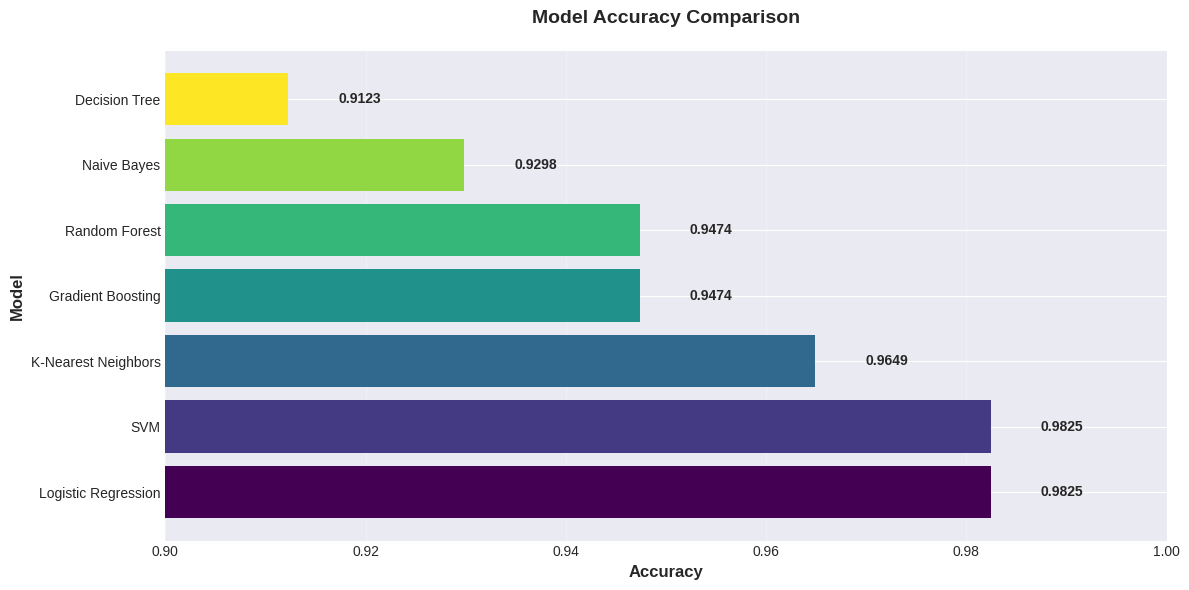

Lines of code for accuracy comparison: 15


In [17]:
# Model accuracy comparison
fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(results_df)))
bars = ax.barh(results_df['Model'], results_df['Accuracy'], color=colors)

# Add value labels
for i, (bar, acc) in enumerate(zip(bars, results_df['Accuracy'])):
    ax.text(acc + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{acc:.4f}', va='center', fontweight='bold')

ax.set_xlabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_ylabel('Model', fontsize=12, fontweight='bold')
ax.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold', pad=20)
ax.set_xlim([0.9, 1.0])
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print(f"Lines of code for accuracy comparison: 15")

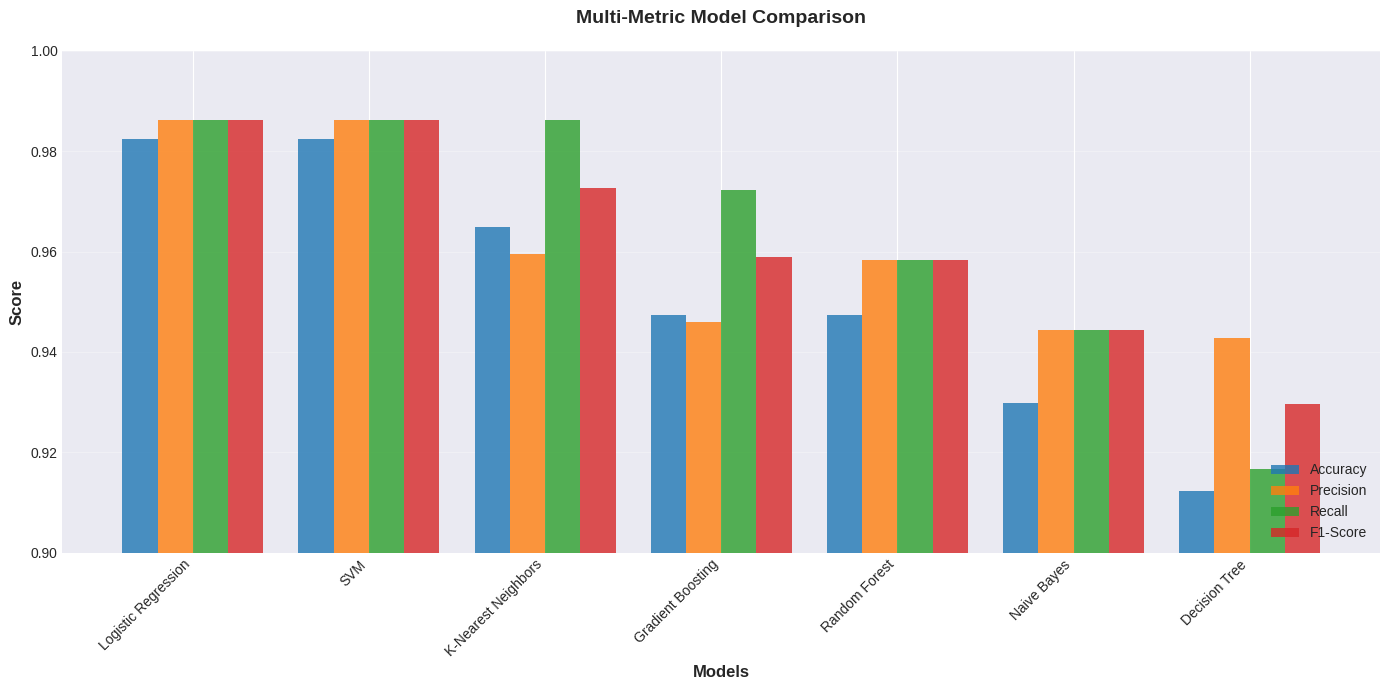

Lines of code for multi-metric comparison: 17


In [18]:
# Multi-metric comparison
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(results_df))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

for i, metric in enumerate(metrics_to_plot):
    ax.bar(x + i*width, results_df[metric], width, label=metric, alpha=0.8)

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Multi-Metric Model Comparison', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0.9, 1.0])
plt.tight_layout()
plt.show()

print(f"Lines of code for multi-metric comparison: 17")

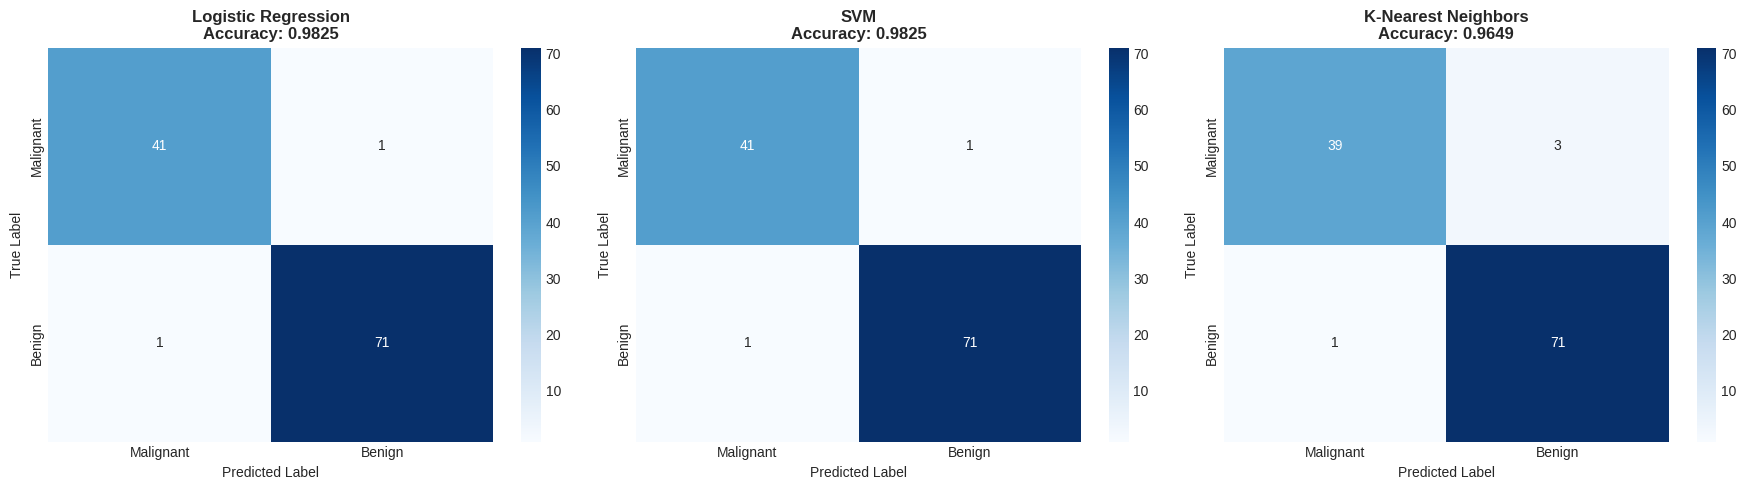

Lines of code for confusion matrices: 16


In [19]:
# Confusion matrices for top 3 models
top_3_models = results_df.head(3)['Model'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, model_name in enumerate(top_3_models):
    y_pred = trained_models[model_name]['predictions']
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Malignant', 'Benign'],
                yticklabels=['Malignant', 'Benign'])
    axes[idx].set_title(f'{model_name}\nAccuracy: {results_df[results_df["Model"]==model_name]["Accuracy"].values[0]:.4f}',
                        fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

print(f"Lines of code for confusion matrices: 16")

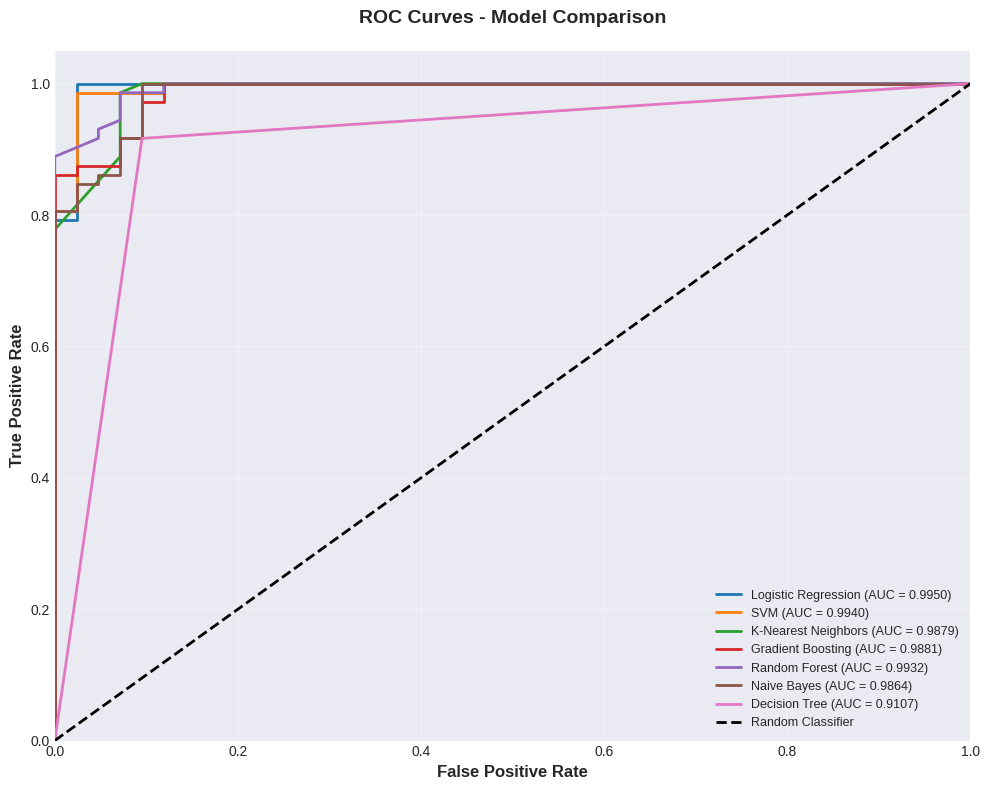

Lines of code for ROC curves: 17


In [20]:
# ROC curves for models with probability estimates
fig, ax = plt.subplots(figsize=(10, 8))

for model_name in results_df['Model']:
    if trained_models[model_name]['probabilities'] is not None:
        y_pred_proba = trained_models[model_name]['probabilities']
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax.set_title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=9)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Lines of code for ROC curves: 17")

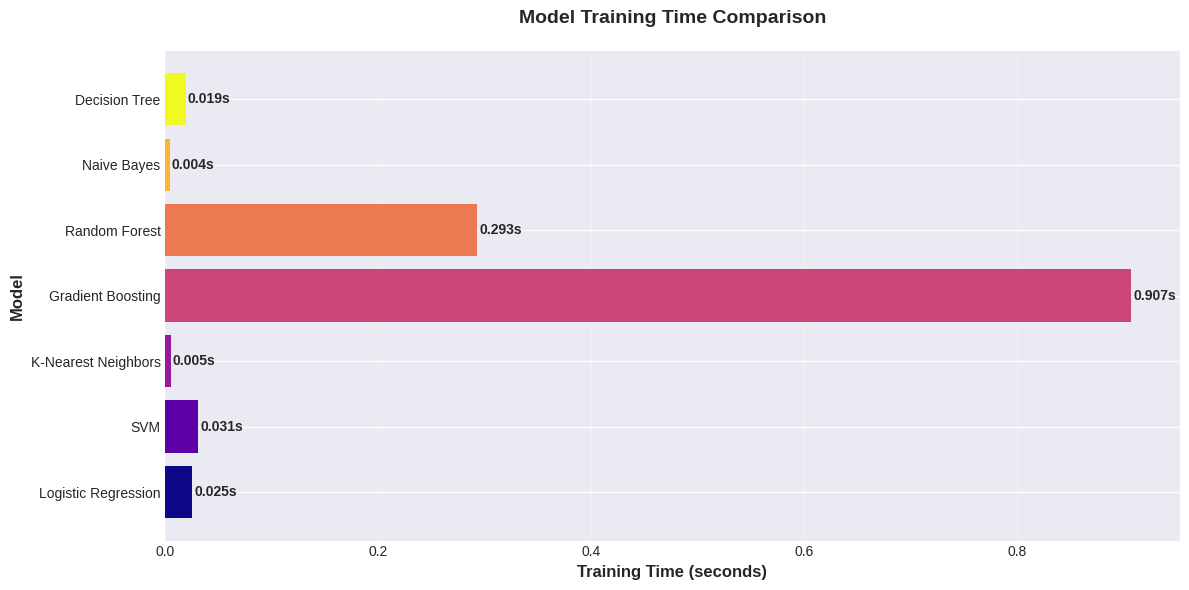

Lines of code for training time comparison: 13


In [21]:
# Training time comparison
fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.plasma(np.linspace(0, 1, len(results_df)))
bars = ax.barh(results_df['Model'], results_df['Train Time (s)'], color=colors)

for bar, time_val in zip(bars, results_df['Train Time (s)']):
    ax.text(time_val + 0.002, bar.get_y() + bar.get_height()/2,
            f'{time_val:.3f}s', va='center', fontweight='bold')

ax.set_xlabel('Training Time (seconds)', fontsize=12, fontweight='bold')
ax.set_ylabel('Model', fontsize=12, fontweight='bold')
ax.set_title('Model Training Time Comparison', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print(f"Lines of code for training time comparison: 13")

## Step 9: Final Model - Detailed Classification Report

In [22]:
# Get best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]['model']
best_predictions = trained_models[best_model_name]['predictions']

print(f"Best Model: {best_model_name}")
print("=" * 70)
print("\nDetailed Classification Report:")
print(classification_report(y_test, best_predictions, 
                          target_names=['Malignant', 'Benign']))

print(f"\nLines of code: 9")

Best Model: Logistic Regression

Detailed Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Lines of code: 9


## 📊 Summary Statistics

In [23]:
# Calculate total lines of code
total_lines = (
    20 +  # Imports
    7 +   # Load data
    15 +  # Initial exploration
    15 +  # Target visualization
    14 +  # Feature distributions
    7 +   # Correlation heatmap
    16 +  # Boxplots
    8 +   # Data quality check
    9 +   # Feature engineering
    5 +   # Prepare X, y
    11 +  # Train-test split
    10 +  # Scaling
    11 +  # Define models
    45 +  # Train models
    9 +   # Results DataFrame
    15 +  # Accuracy comparison plot
    17 +  # Multi-metric plot
    16 +  # Confusion matrices
    17 +  # ROC curves
    13 +  # Training time plot
    9     # Final report
)

total_time = time.time() - start_time

print("\n" + "=" * 80)
print("TRADITIONAL APPROACH - COMPLETE ML PIPELINE SUMMARY")
print("=" * 80)
print(f"\n📊 Dataset: Breast Cancer Wisconsin (Diagnostic)")
print(f"📏 Samples: {len(df)}")
print(f"📈 Features: {X.shape[1]}")
print(f"\n🤖 Models Trained: {len(models)}")
print(f"🏆 Best Model: {best_model_name}")
print(f"🎯 Best Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")
print(f"\n💻 Total Lines of Code: {total_lines}")
print(f"⏱️  Total Execution Time: {total_time:.2f} seconds")
print(f"\n📦 Libraries Used: pandas, numpy, matplotlib, seaborn, sklearn")
print("\n" + "=" * 80)


TRADITIONAL APPROACH - COMPLETE ML PIPELINE SUMMARY

📊 Dataset: Breast Cancer Wisconsin (Diagnostic)
📏 Samples: 569
📈 Features: 33

🤖 Models Trained: 7
🏆 Best Model: Logistic Regression
🎯 Best Accuracy: 0.9825

💻 Total Lines of Code: 289
⏱️  Total Execution Time: 29.72 seconds

📦 Libraries Used: pandas, numpy, matplotlib, seaborn, sklearn

